In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
df = pd.read_csv('/home/davidhenslovitz/Galvanize/ZNAHealth/CSV/LYMYLEUK.csv', converters={'State-county recode': lambda x: str(x), 'CS Schema v0204+': lambda x: str(x)})

In [4]:
df.head()

,Patient ID number,Registry ID,Marital Status at DX,Race/Ethnicity,NHIA Derived Hispanic Origin,Sex,Age at diagnosis,Year of Birth,Sequence Number—Central,Month of diagnosis,...,Lymphomas: Ann Arbor Staging (1983+),CS Mets at Dx-Bone,CS Mets at Dx-Brain,CS Mets at Dx-Liver,CS Mets at Dx-Lung,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Total Number of In Situ/malignant Tumors for Patient,Total Number of Benign/Borderline Tumors for Patient
0,7000008,1502,2,1,0,1,80,1908,2,7,...,4,,,,,88,88,88,2,0
1,7000014,1502,1,1,0,1,85,1897,2,6,...,1,,,,,,,,2,0
2,7000107,1502,5,1,0,2,86,1899,2,11,...,4,,,,,,,,2,0
3,7000120,1502,2,1,0,1,75,1902,0,4,...,8,,,,,,,,1,0
4,7000127,1502,5,1,0,2,77,1921,2,3,...,1,,,,,88,88,88,2,0


In [5]:
df = df.replace(r'\s+', np.nan, regex=True)

In [6]:
len(df.columns[df.isnull().sum()/len(df) > 0.25])

72

In [7]:
df_new = pd.DataFrame()

In [8]:
df["state"] = df["State-county recode"].str[0:2]

In [9]:
df["county"] = df["State-county recode"].str[2:5]

In [10]:
df_new["state"] = df["State-county recode"].str[0:2]

In [11]:
df_new["county"] = df["State-county recode"].str[2:5]

In [12]:
df_new.isnull().sum()

state     0
county    0
dtype: int64

In [13]:
df_new["cancer_type"] = df['CS Schema v0204+']
df_new['year_of_diagnosis'] = df['Year of diagnosis']

In [22]:
df_new.groupby('cancer_type')['cancer_type'].count().sort_values(ascending=False)

cancer_type
064    200372
046    131866
105     56789
104      5259
065      2195
048         4
Name: cancer_type, dtype: int64

In [14]:
df_state = df_new.groupby(['state', 'cancer_type'])['cancer_type'].count().sort_values(ascending=False)
df_state

state  cancer_type
06     064            32792
26     064            32648
09     064            31225
53     064            31051
19     064            27306
26     046            23075
19     046            20377
53     046            20054
09     046            19335
06     046            18950
13     064            15350
49     064            12177
26     105            10879
35     064            10322
13     046             9069
06     105             8696
49     046             8324
09     105             8276
53     105             8164
35     046             7936
19     105             7647
15     064             7501
13     105             4943
15     046             4746
49     105             3122
35     105             3098
15     105             1964
06     104             1473
26     104              971
53     104              648
09     104              597
13     104              445
19     104              444
26     065              388
06     065              385
0

In [15]:
df_county = df_new.groupby(['state','county', 'cancer_type'])['cancer_type'].count().sort_values(ascending=False)
df_county.head(20)

state  county  cancer_type
26     163     064            15653
53     033     064            13478
26     163     046            11618
       125     064            10198
06     001     064             9575
       075     064             8532
53     033     046             8148
09     001     064             8127
       003     064             8074
       009     064             7944
26     125     046             6843
       099     064             6797
06     013     064             6738
26     163     105             6347
06     001     046             5874
       081     064             5705
09     003     046             5195
53     053     064             4942
49     035     064             4928
09     001     046             4922
Name: cancer_type, dtype: int64

In [16]:
df_cali = df_new[(df_new.state=='06')&(df_new.cancer_type=='064')].groupby('year_of_diagnosis')['cancer_type'].count()

In [18]:
df_cali

year_of_diagnosis
1973     395
1974     411
1975     441
1976     420
1977     415
1978     446
1979     477
1980     459
1981     487
1982     509
1983     511
1984     588
1985     642
1986     691
1987     766
1988     789
1989     845
1990     887
1991     899
1992     874
1993     840
1994     922
1995     975
1996     925
1997     881
1998     825
1999     877
2000     919
2001     953
2002     904
2003     888
2004     965
2005     929
2006     894
2007     978
2008    1014
2009     984
2010    1083
2011     991
2012     995
2013     986
2014    1112
Name: cancer_type, dtype: int64

In [84]:
df_wayne = df_new[(df_new.state=='26')&(df_new.cancer_type=='063')].groupby('year_of_diagnosis')['cancer_type'].count()

In [85]:
df_wayne

year_of_diagnosis
1973    1831
1974    1878
1975    1990
1976    2135
1977    2229
1978    2317
1979    2280
1980    2598
1981    2665
1982    2768
1983    2828
1984    2884
1985    2885
1986    2927
1987    2945
1988    3027
1989    3062
1990    3062
1991    3288
1992    3205
1993    3273
1994    3289
1995    3228
1996    3172
1997    3206
1998    3329
1999    3203
2000    3110
2001    3268
2002    3208
2003    3377
2004    3217
2005    3335
2006    3316
2007    3379
2008    3414
2009    3367
2010    3332
2011    3265
2012    3160
2013    3215
2014    3286
Name: cancer_type, dtype: int64

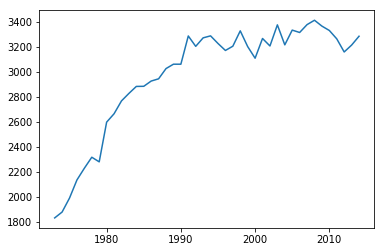

In [88]:
plt.plot(df_wayne.index, df_wayne.values)

In [3]:
df_air = pd.read_csv('Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')

In [4]:
df_air.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [5]:
df_air.MeasureName.value_counts()

Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)               34199
Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)                      34199
Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (monitor and modeled data)                                                   34199
Annual average ambient concentrations of PM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)    34199
Number of person-days with PM2.5 over the National Ambient Air Quality Standard (monitor and modeled data)                                                    34199
Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard                                                 10341
Number of person

In [9]:
df_pm2 = df_air[df_air.MeasureName=='Annual average ambient concentrations of PM 2.5 in micrograms per cubic meter, based on seasonal averages and daily measurement (monitor and modeled data)']
df_ozone = df_air[df_air.MeasureName=='Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)']
df_ozone_p = df_air[df_air.MeasureName=='Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)']

In [10]:
df_pm2_group = df_pm2.groupby(['CountyName'])['Value'].mean().sort_values(ascending=False)

In [17]:
df_pm2.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
184435,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1001,Autauga,2001,13.186807,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
184436,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1001,Autauga,2002,12.490668,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
184437,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1001,Autauga,2003,12.869481,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
184438,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1001,Autauga,2004,13.111945,µg/m³,Micograms per cubic meter,Monitor & Modeled,0
184439,296,Annual average ambient concentrations of PM 2....,Average,State x County,1,Alabama,1001,Autauga,2005,13.543276,µg/m³,Micograms per cubic meter,Monitor & Modeled,0


In [24]:
df_pm2['CountyFips'] = df_pm2['CountyFips'].apply(lambda x: str(x).zfill(5))

/home/davidhenslovitz/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_pm2.head(20)

,CountyFips,ReportYear,Value,UnitName
184435,01001,2001,13.186807,Micograms per cubic meter
184436,01001,2002,12.490668,Micograms per cubic meter
184437,01001,2003,12.869481,Micograms per cubic meter
184438,01001,2004,13.111945,Micograms per cubic meter
184439,01001,2005,13.543276,Micograms per cubic meter
184440,01001,2006,13.638252,Micograms per cubic meter
184441,01001,2007,14.542888,Micograms per cubic meter
184442,01001,2008,12.507304,Micograms per cubic meter
184443,01001,2009,10.279905,Micograms per cubic meter
184444,01001,2010,11.093826,Micograms per cubic meter


In [27]:
df_pm2 = df_pm2[['CountyFips', 'ReportYear','Value','UnitName']]

In [28]:
df_pm2.head()

,CountyFips,ReportYear,Value,UnitName
184435,01001,2001,13.186807,Micograms per cubic meter
184436,01001,2002,12.490668,Micograms per cubic meter
184437,01001,2003,12.869481,Micograms per cubic meter
184438,01001,2004,13.111945,Micograms per cubic meter
184439,01001,2005,13.543276,Micograms per cubic meter


In [128]:
df_ozone = df_ozone.groupby(['CountyName'])['Value'].mean().sort_values(ascending=False)

In [129]:
df_ozone.head(20)

CountyName
San Bernardino    114.090909
Riverside         107.636364
Kern              105.090909
Tulare            104.545455
Los Angeles        86.272727
Fresno             78.363636
El Dorado          42.636364
Merced             39.909091
Sacramento         39.272727
Placer             36.000000
Ventura            35.363636
Mariposa           33.454545
Tarrant            31.181818
San Diego          28.090909
Maricopa           28.000000
Queen Anne's       25.636364
Harford            24.818182
Kings              24.272727
Denton             23.181818
Imperial           23.090909
Name: Value, dtype: float64

In [130]:
df_ozone_p = df_ozone_p.groupby(['CountyName'])['Value'].mean().sort_values(ascending=False)

In [132]:
df_ozone_p.head(50)

CountyName
Los Angeles             8.418584e+08
San Bernardino          2.209387e+08
Riverside               2.102663e+08
Maricopa                9.768104e+07
San Diego               8.311229e+07
Kern                    8.004823e+07
Harris                  7.549499e+07
Fresno                  6.799177e+07
Sacramento              5.336680e+07
Tarrant                 5.107156e+07
Tulare                  4.277399e+07
Ventura                 2.802258e+07
Philadelphia            2.784962e+07
Cook                    2.197379e+07
Allegheny               2.138448e+07
Fairfax                 2.087182e+07
Bexar                   1.914615e+07
Prince George's         1.606620e+07
Queens                  1.507524e+07
Kings                   1.492384e+07
Cuyahoga                1.409716e+07
Baltimore               1.371584e+07
New York                1.298147e+07
Denton                  1.297932e+07
New Haven               1.228704e+07
Nassau                  1.162249e+07
Collin                  1.1

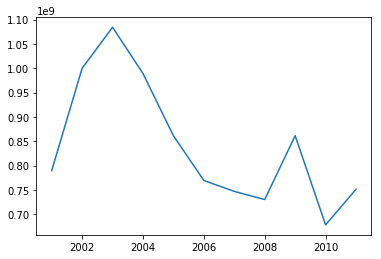

In [138]:
df_years = df_air[(df_air.MeasureName=='Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard (monitor and modeled data)')&(df_air.CountyName=='Los Angeles')]
plt.plot(df_years.ReportYear, df_years.Value)